# Bike Sharing Demand

#### Reference
Vivek Srinivasan's EDA & Ensemble Model (Top 10 Percentile)<br> 
https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('sampleSubmission.csv')

In [3]:
train.shape, test.shape, submit.shape

((10886, 12), (6493, 9), (6493, 2))

In [4]:
train.columns, test.columns, submit.columns

(Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
       dtype='object'),
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed'],
       dtype='object'),
 Index(['datetime', 'count'], dtype='object'))

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Data Analysis

#### Explore data
- datetime : hourly data + timestamp
- season : 1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday : 그날이 휴가로 간주하는지 (1 or 0)
- workingday : 그날이 주말이든 휴가이든
- weather : <br>
    1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
- temp : 섭씨 온도
- atemp : 섭씨 온도와 같은 느낌
- humidity : 습도
- windspeed : 바람 속도
- casual : 비 등록 사용자의 대여 횟수
- registered : 등록 사용자의 대여 횟수
- count : 전체 대여 횟수

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [10]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


## EDA(Explorator Data Analysis)<br>

먼저 datetime속성을 분리하여 추출된 속성으로 활용하기 위해 <strong>split함수</strong>를 사용하여 년-월-일과 시간을 분리한다.
 <br> <br>

- import calendar : 달력을 볼 수 있게 해주는 모듈
    - calendar.calendar(2020), calendar.prcal(2020) :  달력 출력
    - calendar.prmonth(2020,3) : 특정 연도의 특정 월 달력만 확인
    - calendar.weekday(2020,3,17) : 특정 날짜의 요일 확인<br><br>
    
    
- import datetime : 날짜와 시간을 조작하는 클래스를 제공하는 모듈
    - datetime.strptime(date_string, format) : 날짜, 시간형식의 문자열을 datetime으로 만들 때 <br> ex) timeStr = '2018-07-28 12:11:32'<br>Thistime = datetime.datetime.strptime(timeStr, '%Y-%m-%d %H:%M:%S')
    - datetime.strftime(format) : 시간을 문자열로 출력<br>ex) now.strftime('%Y-%m-%d')

In [11]:
train['date'] = train.datetime.apply(lambda x : x.split()[0])

In [12]:
#train.date.apply(lambda x : x.split('-'))

In [13]:
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [14]:
# 특정 날짜의 요일 확인
#train.date.apply(lambda x : calendar.day_name[datetime.strptime(x, '%Y-%m-%d').weekday()])

In [15]:
#train.datetime.apply(lambda x : x.split()[1].split(':')[0])

In [16]:
train['year'] = train.date.apply(lambda x : x.split('-')[0])
train['month'] = train.date.apply(lambda x : x.split('-')[1])
train['day'] = train.date.apply(lambda x : x.split('-')[2])

train['weekday'] = train.date.apply(lambda x : calendar.day_name[datetime.strptime(x, '%Y-%m-%d').weekday()])
train['hour'] = train.datetime.apply(lambda x : x.split()[1].split(':')[0])

In [17]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,Saturday,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,Saturday,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,Saturday,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,Saturday,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,Saturday,04


- pd.to_numeric() : 문자열 칼럼을 숫자형으로 바꾸는 방법
    - errors='coerce' : 변환 시 ValueError 를 무시하는 속성

In [18]:
#change from string to number
train['year'] = pd.to_numeric(train.year, errors='coerce')
train['month'] = pd.to_numeric(train.month, errors='coerce')
train['day'] = pd.to_numeric(train.day, errors='coerce')
train['hour'] = pd.to_numeric(train.hour, errors='coerce')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  weekday     10886 non-null  object 
 17  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [20]:
#불필요한 date 삭제
train = train.drop('date', axis=1)

### Data visualizaion
<br>
count와 함께 관계 파악하기
<br><br>
아무래도 데이터프레임의 다양한 전처리 과정을 거치게 되면 인덱스가 뒤죽박죽인 경우가 많다. 이럴때 인덱스를 다시 처음부터 재배열 해주는 유용한 함수다.<br>

- reset_index() : 행 인덱스 초기화


### year, month, day, hour

In [21]:
train.groupby('year')['count'].mean()

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

<AxesSubplot:xlabel='hour', ylabel='count'>

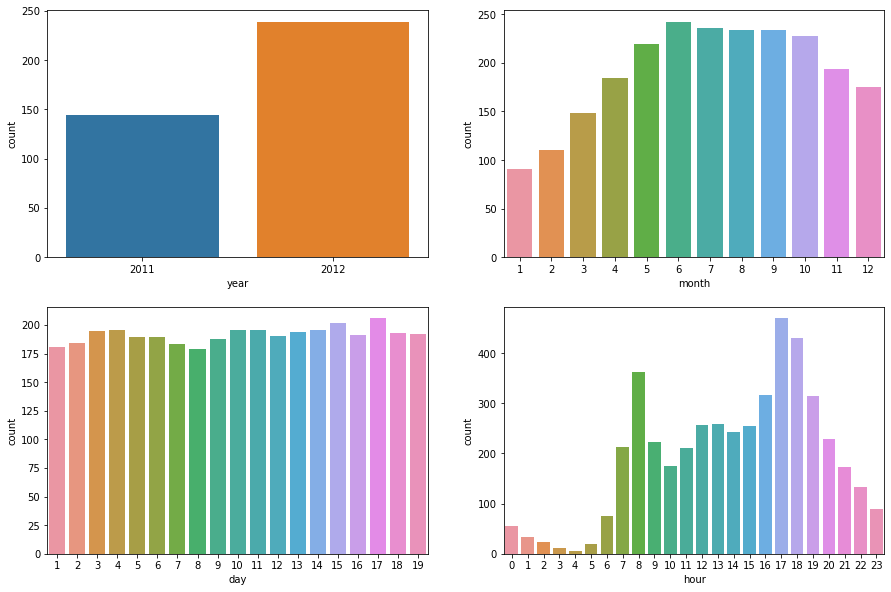

In [22]:
fig, ax= plt.subplots(2, 2, figsize=[15,10])

#year
sns.barplot(x='year', y='count', data=train.groupby('year')['count'].mean().reset_index(), ax=ax[0, 0])

#month
sns.barplot(x='month', y='count', data=train.groupby('month')['count'].mean().reset_index(), ax=ax[0, 1])

#day
sns.barplot(x='day', y='count', data=train.groupby('day')['count'].mean().reset_index(), ax=ax[1, 0])

#hour
sns.barplot(x='hour', y='count', data=train.groupby('hour')['count'].mean().reset_index(), ax=ax[1, 1])

### season, holiday, workingday, weather     

<AxesSubplot:xlabel='weather', ylabel='count'>

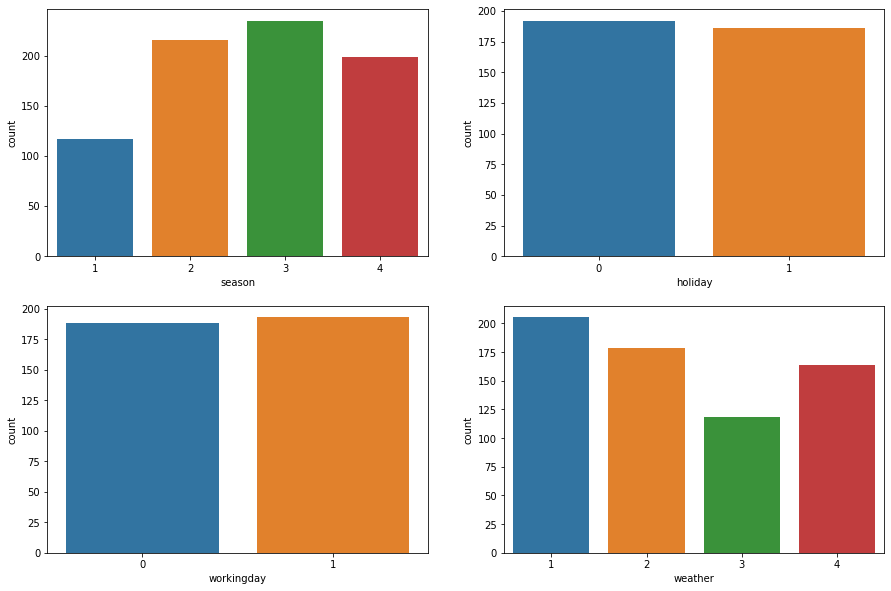

In [23]:
fig, ax= plt.subplots(2, 2, figsize=[15, 10])

#season
sns.barplot(x='season', y='count', data=train.groupby('season')['count'].mean().reset_index(), ax=ax[0, 0])

#holiday
sns.barplot(x='holiday', y='count', data=train.groupby('holiday')['count'].mean().reset_index(), ax=ax[0, 1])

#workingday
sns.barplot(x='workingday', y='count', data=train.groupby('workingday')['count'].mean().reset_index(), ax=ax[1, 0])

#weather
sns.barplot(x='weather', y='count', data=train.groupby('weather')['count'].mean().reset_index(), ax=ax[1, 1])

 ### temp, atemp, humidity, windspeed
 
 - sns.distplot : 가장 기초적인 히스토그램
     - bins :기본 타입에서 빈의 갯수를 조정하는 속성
     - hist=True, kde=False, rug=False : 선없이 막대 그래프만 출력하는 속성
     - hist=True, kde=True, rug=True : rug와 커널 밀도를 함께 출력하는 속성

In [24]:
int(train['temp'].min())

0

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

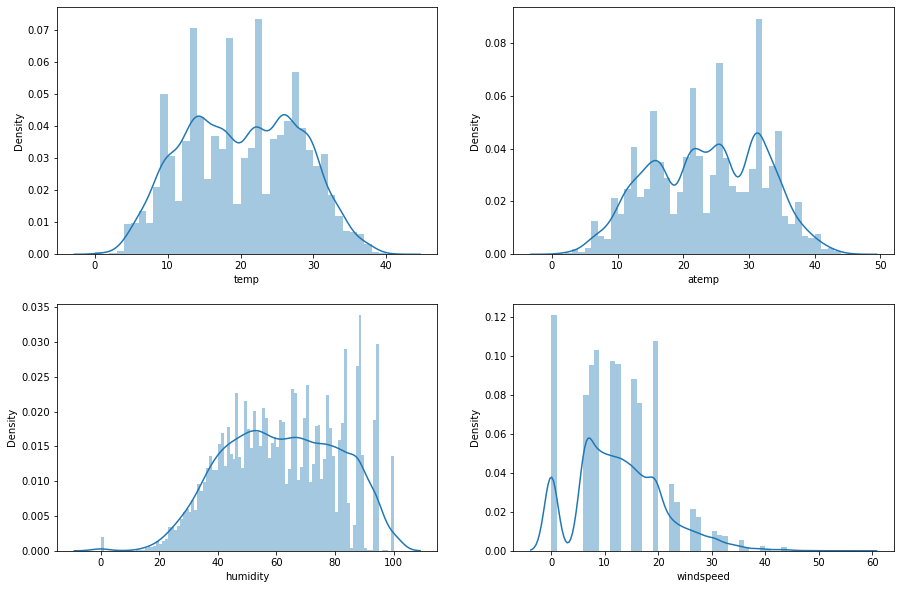

In [25]:
fig, ax= plt.subplots(2, 2, figsize=[15,10])

#temp
sns.distplot(train['temp'], bins=range(int(train['temp'].min()), int(train['temp'].max())+1), ax=ax[0, 0])

#atemp
sns.distplot(train['atemp'], bins=range(int(train['atemp'].min()), int(train['atemp'].max())+1), ax=ax[0, 1])

#humidity
sns.distplot(train['humidity'], bins=range(int(train['humidity'].min()), int(train['humidity'].max())+1), ax=ax[1, 0])

#windspeed
sns.distplot(train['windspeed'], bins=range(int(train['windspeed'].min()), int(train['windspeed'].max())+1), ax=ax[1, 1])

각각의 columns들 간의 상관계수를 heatmap을 통해 visaualizaion하기

<AxesSubplot:>

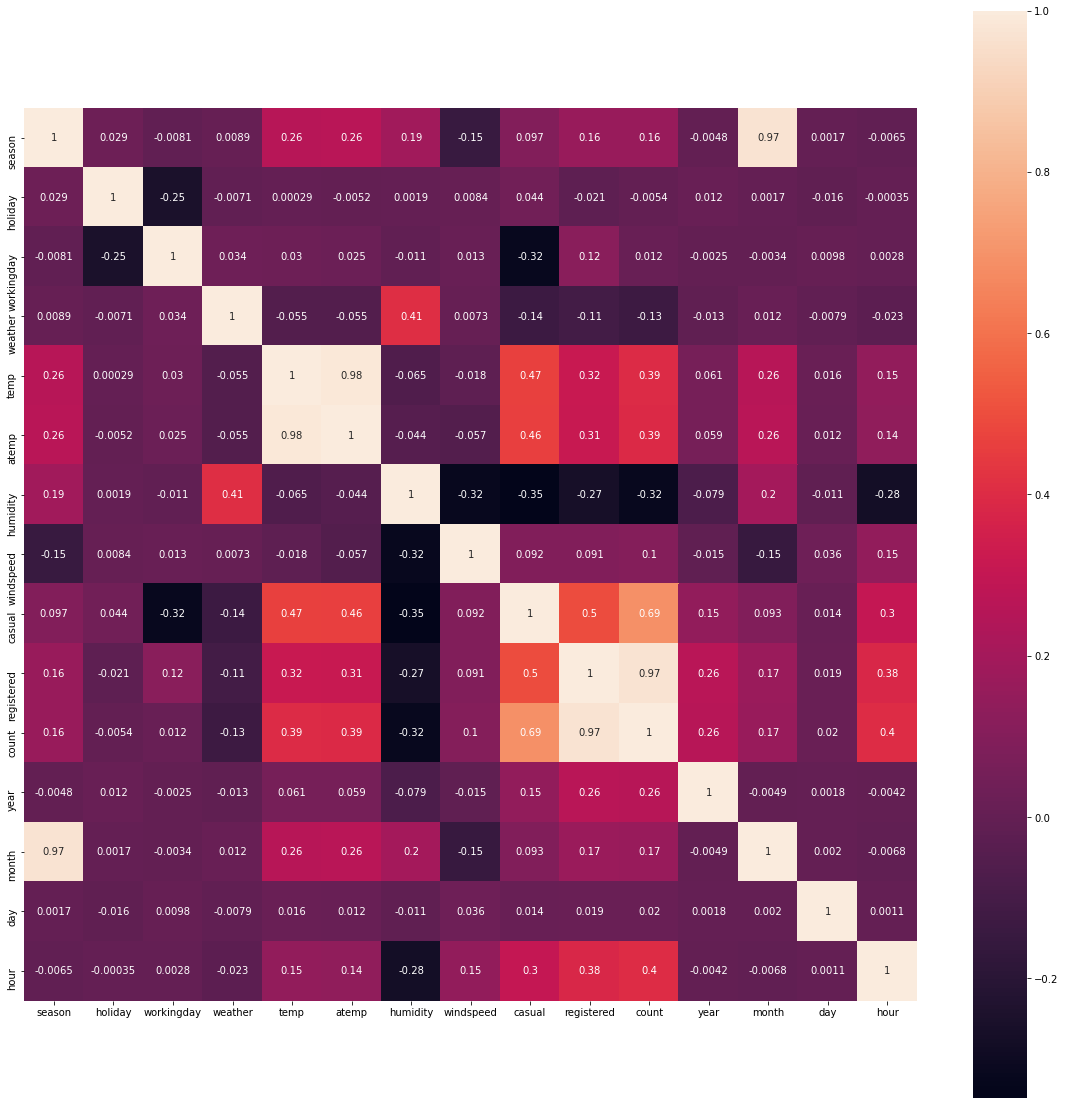

In [26]:
plt.subplots(figsize=[20,20])
sns.heatmap(train.corr(), annot=True, square=True)

heatmap 상관관계를 참조하여 두 개의 서로 다른 columns이 적용된 count를 visualization해보기

<AxesSubplot:xlabel='hour', ylabel='count'>

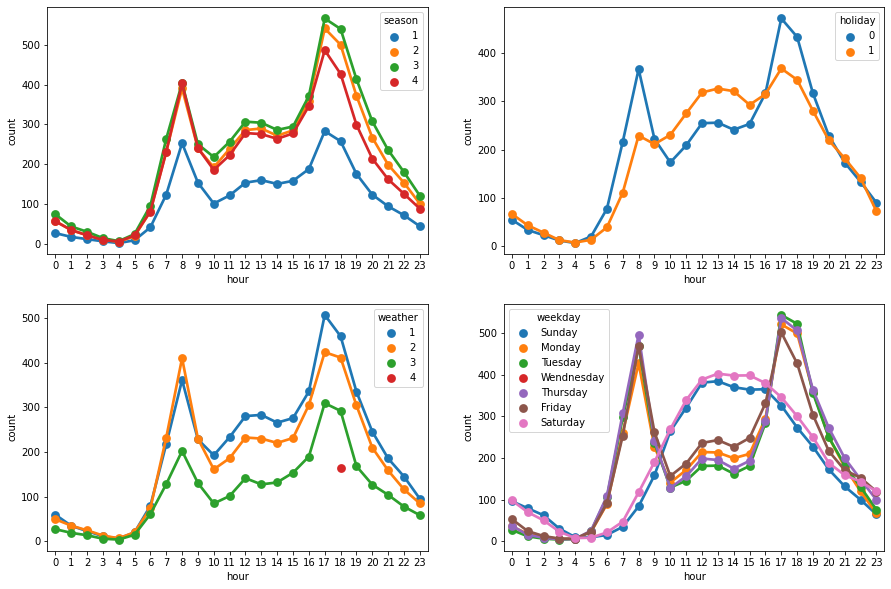

In [27]:
fig, ax= plt.subplots(2, 2, figsize=[15,10])

#hour and season with count
sns.pointplot(x='hour', y='count', hue='season',data=train.groupby(['hour','season'])['count'].mean().reset_index(), ax=ax[0, 0])

#hour and holiday with count
sns.pointplot(x='hour', y='count', hue='holiday', data=train.groupby(['hour','holiday'])['count'].mean().reset_index(), ax=ax[0, 1])

#hour and workingday with count
#sns.pointplot(x='hour', y='count', hue='workingday', data=train.groupby(['hour','workingday'])['count'].mean().reset_index(), ax=ax[1, 0])

#hour and weather with count
sns.pointplot(x='hour', y='count', hue='weather', data=train.groupby(['hour','weather'])['count'].mean().reset_index(), ax=ax[1, 0])

#hour and weekday with count
sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday']
              ,data=train.groupby(['weekday','hour'])['count'].mean().reset_index(), ax=ax[1,1])

weather에서 4인 경우 이상치 확인하기 (하나만 존재한다는 의미이다.)

In [28]:
train[train['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,Monday,18


<AxesSubplot:xlabel='year', ylabel='count'>

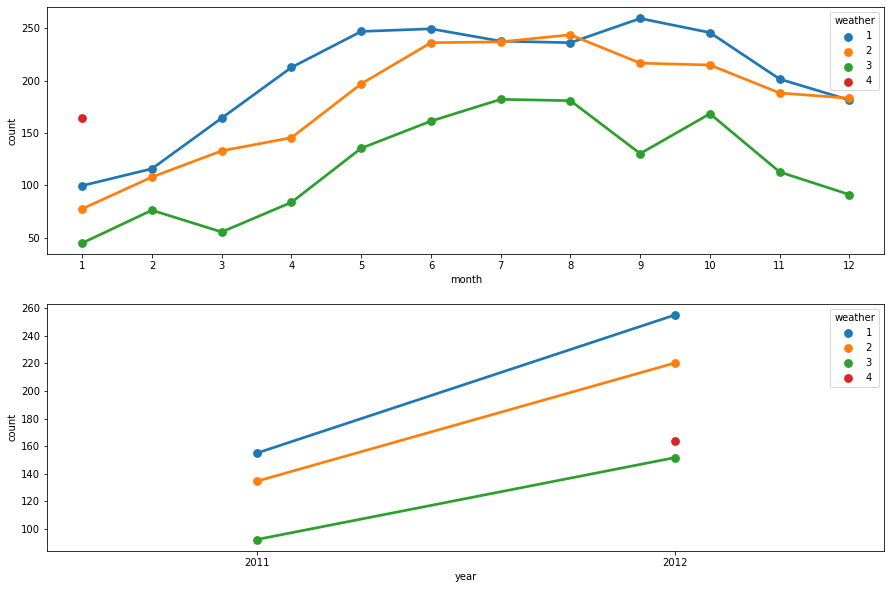

In [29]:
fig = plt.figure(figsize=[15,10])

#month and weather with count
ax1 = fig.add_subplot(2,1,1)
sns.pointplot(x='month', y='count', hue='weather',data=train.groupby(['month','weather'])['count'].mean().reset_index())

#month and weather with count
ax1 = fig.add_subplot(2,1,2)
sns.pointplot(x='year', y='count', hue='weather',data=train.groupby(['year','weather'])['count'].mean().reset_index())


windspeed columns를 살펴보기전에 string value는 사용이 불가능하기 때문에 string을 category하고 각각에 해당하는 값을 숫자로 변환해준다.(convert)
<br><br>
- df['a'].astype('category') : 카테고리 자료형으로 치환
- df['a'].cat.categories : 카테고리의 값을 확인
- df['a'].cat.categories = ['1'] : 카테고리의 기존값을 다른 이름으로 새롭게 정의

In [30]:
train['weekday'] = train['weekday'].astype('category')

In [31]:
train['weekday'].cat.categories

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [32]:
#0:sunday, 1:monday, 2:tuesday, ... 6:saturday
train['weekday'].cat.categories = ['5','1','6','0','4','2','3']

In [33]:
train['weekday'].cat.categories

Index(['5', '1', '6', '0', '4', '2', '3'], dtype='object')

windspeed columns는 0인 값들이 많아, 실제로 0이거나 값을 제대로 측정하지 못해 0이 되는 경우가 있다. <br>
<strong>RandomForest</strong>를 활용하여 windspeed를 살펴보자.
<br><br>
- windspeed가 0이거나 아닌 dataframe으로 분리
- 학습시키는 0이 아닌 dataframe은 windspeed만 담긴 시리즈와 이외의 학습시킬 column들의 dataframe으로 분리
- 학습 시킨 후, windspeed가 0인 dataframe에서 학습시킨 column와 같게 추출하여 결과값 부여
- windspeed가 0인 dataframe에 windspeed 값을 부여

In [34]:
from sklearn.ensemble import RandomForestRegressor

#dataframe
windspeed_zero = train[train['windspeed'] == 0]
windspeed_not_zero = train[train['windspeed'] != 0]

#windspeed_zero dataframe에 원하지 않는 columns 배제
windspeed_zero_df = windspeed_zero.drop(['windspeed','casual','registered','count','datetime'], axis=1)

#windspeed_not_zero dataframe은 windspeed_zero와 같은 dataframe을 형성하고 학습시킬 windspeed series를 그대로 둠.
windspeed_not_zero_df = windspeed_not_zero.drop(['windspeed','casual','registered','count','datetime'], axis=1)
windspeed_not_zero_series = windspeed_not_zero['windspeed']

In [35]:
#windspeed_not_zero['windspeed']

In [36]:
rf = RandomForestRegressor()
fit_rf = rf.fit(windspeed_not_zero_df, windspeed_not_zero_series)

In [37]:
pred_rf = rf.predict(windspeed_zero_df)

In [38]:
#predict windspeed values
pred_rf

array([ 9.951644,  9.951577,  9.631652, ...,  9.720963, 11.549594,
       11.661551])

In [39]:
windspeed_zero['windspeed'] = pred_rf

- pd.concat() : 여러개의 동일한 형태 DataFrame 합치는 방식

In [40]:
train = pd.concat([windspeed_zero, windspeed_not_zero], axis=0)

- pd.to_datetime() : DataFrame 열을 datetime 으로 변환하는 함수
    - errors='coerce' : 변환 시 ValueError 를 무시하는 속성

In [41]:
#시간 별로 정렬을 위해 datetime으로 변환
train['datetime'] = pd.to_datetime(train['datetime'], errors='coerce')

In [42]:
train = train.sort_values(by=['datetime'])

windspeed를 살펴본 후, heatmap을 통해 상관계수를 visaualizaion하기

<AxesSubplot:>

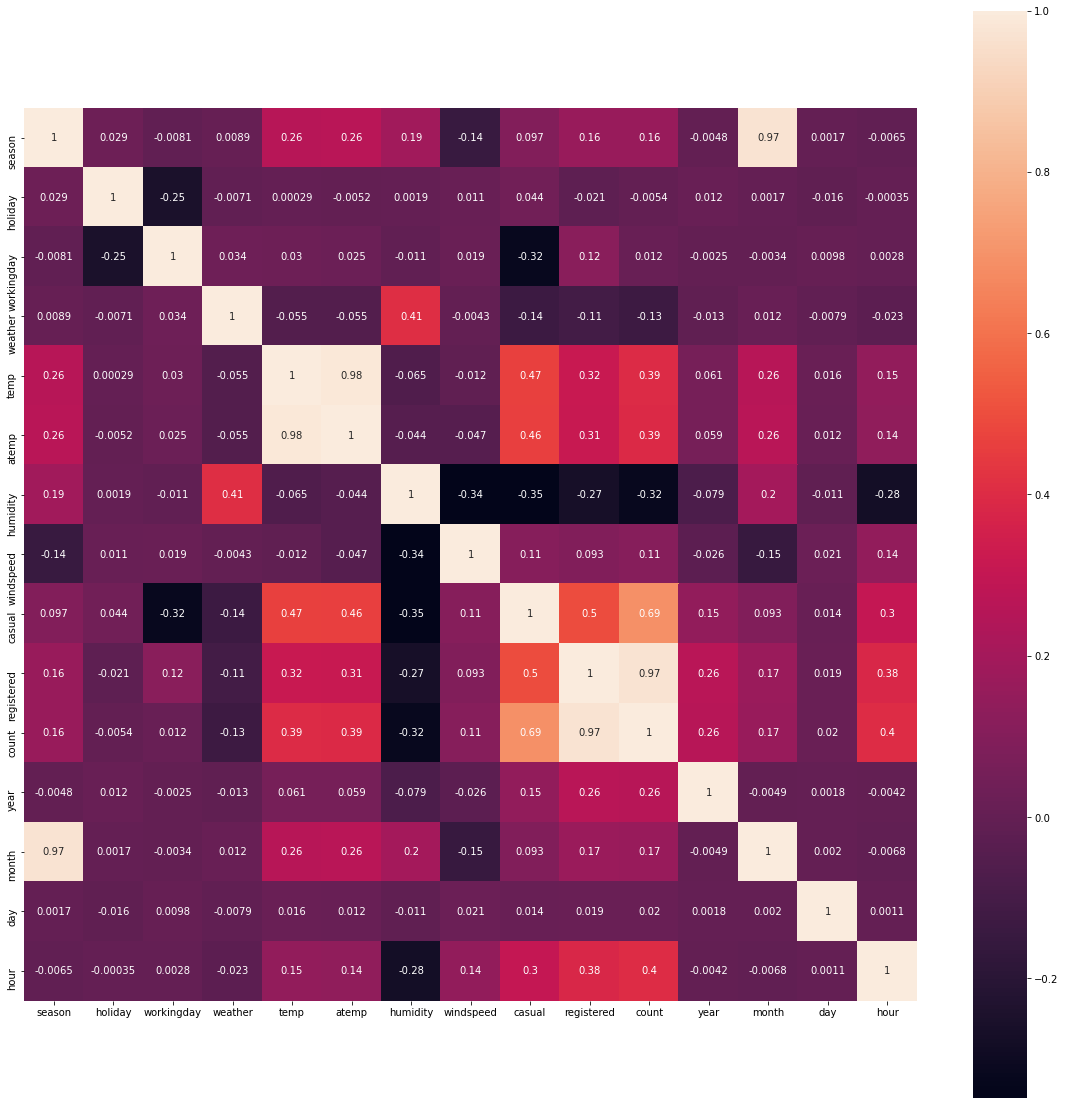

In [43]:
plt.figure(figsize=[20,20])
sns.heatmap(train.corr(), annot=True, square=True)

하지만, 생각과 달리 windspeed와 count는 0.1에서 0.11로 차이가 크지 않는다.
<br><br>
- np.linspace(start,stop,num, endpoint=True) : 1차원 배열을 만드는 함수

min value of windspeed : 6.0032


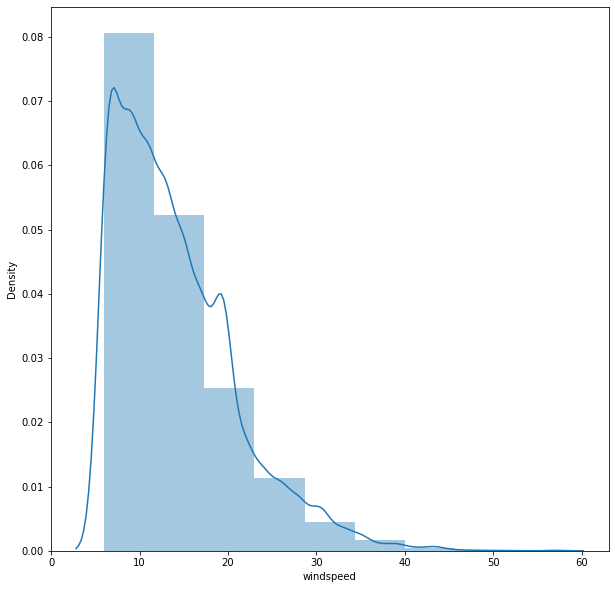

In [44]:
plt.figure(figsize=[10,10])
sns.distplot(train['windspeed'], bins=np.linspace(train['windspeed'].min(), train['windspeed'].max(), 10))

print('min value of windspeed : {}'.format(train.windspeed.min()))

##### preprocessing with test set and train set

In [45]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [46]:
#위, 아래로 dataframe을 합치기
combine = pd.concat([train, test], axis=0)

In [47]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


In [48]:
combine['date'] = combine.datetime.apply(lambda x : x.split()[0])

combine['year'] = combine.date.apply(lambda x : x.split('-')[0])
combine['month'] = combine.date.apply(lambda x : x.split('-')[1])
combine['day'] = combine.date.apply(lambda x : x.split('-')[2])
combine['hour'] = combine.datetime.apply(lambda x : x.split()[1].split(':')[0])

combine['weekday'] = combine.date.apply(lambda x : calendar.day_name[datetime.strptime(x, '%Y-%m-%d').weekday()])

In [49]:
#change from string to number
combine['year'] = pd.to_numeric(combine.year, errors='coerce')
combine['month'] = pd.to_numeric(combine.month, errors='coerce')
combine['day'] = pd.to_numeric(combine.day, errors='coerce')
combine['hour'] = pd.to_numeric(combine.hour, errors='coerce')

In [50]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  date        17379 non-null  object 
 13  year        17379 non-null  int64  
 14  month       17379 non-null  int64  
 15  day         17379 non-null  int64  
 16  hour        17379 non-null  int64  
 17  weekday     17379 non-null  object 
dtypes: float64(6), int64(9), object(3)
memory usage: 2.5+ MB


In [51]:
combine = combine.drop('date', axis=1)

In [52]:
combine['weekday'] = combine['weekday'].astype('category')

In [53]:
#combine.info()

In [54]:
print(combine.weekday.cat.categories)

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


In [55]:
combine['weekday'].cat.categories = ['5','1','6','0','4','2','3']

In [56]:
c_windspeed_zero = combine[combine['windspeed'] == 0]
c_windspeed_not_zero = combine[combine['windspeed'] != 0]

In [57]:
c_windspeed_zero.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [58]:
#windspeed_zero dataframe에 원하지 않는 columns 배제
c_windspeed_zero_df = c_windspeed_zero.drop(['windspeed','casual','registered','count','datetime'], axis=1)

#windspeed_not_zero dataframe은 windspeed_zero와 같은 dataframe을 형성하고 학습시킬 windspeed series를 그대로 둠.
c_windspeed_not_zero_df = c_windspeed_not_zero.drop(['windspeed','casual','registered','count','datetime'], axis=1)
c_windspeed_not_zero_series = c_windspeed_not_zero['windspeed']

In [59]:
c_windspeed_zero_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,1,1,0,6
1,1,0,0,1,9.02,13.635,80,2011,1,1,1,6
2,1,0,0,1,9.02,13.635,80,2011,1,1,2,6
3,1,0,0,1,9.84,14.395,75,2011,1,1,3,6
4,1,0,0,1,9.84,14.395,75,2011,1,1,4,6


In [60]:
c_windspeed_not_zero_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,day,hour,weekday
5,1,0,0,2,9.84,12.880,75,2011,1,1,5,6
10,1,0,0,1,15.58,19.695,76,2011,1,1,10,6
11,1,0,0,1,14.76,16.665,81,2011,1,1,11,6
12,1,0,0,1,17.22,21.210,77,2011,1,1,12,6
13,1,0,0,2,18.86,22.725,72,2011,1,1,13,6


In [61]:
c_rf = RandomForestRegressor()
c_fit_rf = c_rf.fit(c_windspeed_not_zero_df, c_windspeed_not_zero_series)

In [62]:
c_pred_rf = c_fit_rf.predict(c_windspeed_zero_df)

In [63]:
c_pred_rf

array([ 7.872232,  7.59244 ,  7.232449, ...,  8.122276, 24.160401,
       11.040461])

In [64]:
c_windspeed_zero['windspeed'] = c_pred_rf

In [65]:
combine = pd.concat([c_windspeed_zero, c_windspeed_not_zero], axis=0)

category와 삭제할 columns을 분류

In [66]:
combine.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [67]:
categories_col = [ 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'weekday', 'hour']
drop_col = ['datetime', 'casual', 'registered', 'count']

column들 중 값들이 일정하고 정해져있는 있으면, category로 변경

In [68]:
# change to category
for col in categories_col : 
    combine[col] = combine[col].astype('category')

In [92]:
#combine[combine['count'].notnull()].sort_values(by='datetime')

In [70]:
#combine[~combine['count'].notnull()].sort_values(by='datetime')

In [71]:
# splitting Train And Test Data
s_train = combine[combine['count'].notnull()].sort_values(by='datetime')
s_test = combine[~combine['count'].notnull()].sort_values(by='datetime')

# 데이터 훈련시 필요한 결과 값들
datetime_col = s_test['datetime']
ylabels_casual = s_train['casual'] #비등록 사용자
ylabels_registered = s_train['registered'] #등록 사용자
ylabels_count = s_train['count']

In [72]:
# drop the columns that is not necessity
s_train = s_train.drop(drop_col, axis=1)
s_test = s_test.drop(drop_col, axis=1)

## Choosing the Best Model

### RMSLE(Root Mean Squared Log Error)

회귀의 평가를 위한 지표는 실제 값과 회귀 예측 값의 차이를 기반으로 한다. <br>
회구 평가 지표 중에 RMSLE가 있는데 값이 작을수록 회귀 성능이 좋다. 예측 값과 실제 값의 차이가 없다는 뜻이기 때문이다. 

과대평가 된 항목(Over Estimation)보다는 과소평가 된 항목(Under Estimation)에 페널티(벌)를 준다. 즉, 예측 값이 실제 값보다 클 때보다 예측 값이 실제 값보다 작을 때 더 큰 패널티를 부여한다. <br>
오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root)으로 값이 작을수록 정밀도가 높다.<br>
0에 가까운 값이 나올수록 정밀도가 높은 값이다.<br><br>
$$ \sqrt{\frac{1}{n} \sum{i=1}n (\log(pi + 1) - \log(a_i+1))2 }$$<br>
$$p = Predicted, a = Actual$$
<br><br>
- np.exp(): 지수함수 (exponential function)

In [73]:
def rmsle(pred_y, y, convertexp=True) : # y is actual value
    if convertexp:
        pred_y = np.exp(pred_y)
        y = np.exp(y)
    #log1 = np.nan_to_num(np.array(np.log(pred_y + 1)))
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in pred_y]))
    log2 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

### LinearRegression

In [74]:
from sklearn.linear_model import LinearRegression

lr_ex = LinearRegression()
lr_ex.fit(s_train, ylabels_count)

LinearRegression()

In [75]:
pred_lr_ex = lr_ex.predict(s_train)
pred_lr_ex

array([-80.06410122, -75.37510168, -67.84989779, ..., 310.72958893,
       318.95280258, 314.09835387])

- np.log1p() : 
       x=0 인 경우 y가 -무한대(-infinite)의 값을 가진다. NumPy 에 '0'이 포함된 배열을 np.log() 함수에 대입하면 'RuntimeWarning: divide by zero encountered in log' 라는 경고메시지가 뜨고, -inf 가 포함된 배열을 반환하게 된다. 이럴 때 사용하는 방법이 'x+1'을 해줘서 '0' -> '1' 로 바꿔주는 함수이다. 그러면 y값이 '-inf' -> '0'으로 바뀌게 된다.

In [76]:
lr = LinearRegression()
ylabels_count_log = np.log1p(ylabels_count)
fit_lr = lr.fit(s_train, ylabels_count_log)

In [77]:
pred_lr = fit_lr.predict(s_train)

In [78]:
pred_lr

array([2.27997568, 2.35783654, 2.4538599 , ..., 5.77504884, 5.87359552,
       5.88600228])

RMSLE 함수의 요소에 np.exp() 지수 함수를 사용하는 이유는 pred_lr의 값이 한번 log를 사용한 값이므로 기본 모델에는 log를 하지 않은 기본 값을 사용하기 위해서이다.

In [164]:
rmsle_lr = rmsle(np.exp(ylabels_count_log), np.exp(pred_lr), False)
print('RMSLE value of Linear Regression : {}'.format(rmsle_lr))

RMSLE value of Linear Regression : 0.9773491951309955


데이터를 훈련을 할 때, log값을 이용하는 이유는 count 값의 max과 min 값의 너비가 너무 커서 log를 취하지 않으면, 결과 값이 무한대로 나오게 된다.

In [80]:
ylabels_count.min(), ylabels_count.max()

(1.0, 977.0)

In [81]:
#sns.distplot(ylabels_count, bins=range(ylabels_count.min().astype('int'), ylabels_count.max().astype('int')))

<AxesSubplot:xlabel='count', ylabel='Density'>

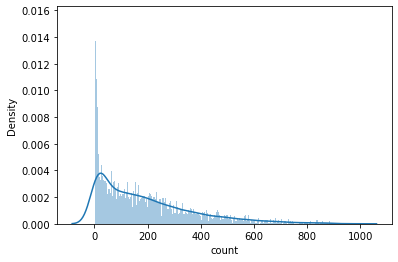

In [82]:
sns.distplot(ylabels_count, bins=range(int(ylabels_count.min()), int(ylabels_count.max())))

In [83]:
ylabels_count.count()

10886

### GridSearchCV

모델의 최적 파라메터를 도출하기 위해서 Kfold 와 Grid Search를 이용한다. Scikit-learn의 GridSearchCV 클래스를 이용한다.
<br><br>
GridSearchCV는 cross-validation을 기반으로 최적 값을 찾아준다. 즉, 데이터 세트를 cross-validation을 위한 학습/데이터 세트로 자동 분할 후 파라미터를 순차적으로 적용해간다. GridSearchCV는 편리한 대신 수행시간이 상대적으로 오래 걸린다.
<br><br>
- Ridge : 일반적으로 사용 (default)
- LASSO : 변수가 많아서 줄여야할 때 사용하고 모델의 단순화 및 해석에 용이하다

#### cost function

1. 계수(가중치)의 절대값에 비례하는 penalty 추가 : L1 규제 -> Lasso Regression<br>
    L1 규제는 일부 계수 값을 완전히 0으로 만들 수 있다. 
    <br><br>
2. 계수(가중치)의 제곱에 비례하는 penalty 추가 : L2 규제 -> Ridge Regression<br>
    L2 규제는 계수 값을 작게 만들지만 완전히 0이 되지 않는다. 
<br><br>
- make_scorer() : 검증 척도 함수
- GridSearchCV(estimator, param_grid, cv = 5, scoring='~')
    - sklearn에서 해당 클래스를 제공하여 그리드 서치를 진행하는 함수
    - estimator : sklearn estimator interface
    - param_grid : 찾고자하는 매개변수의 이름을 선언한다. dict 또는 dict의 리스트 형태로 전달한다. 
    - cv 속성 : int로, 교차검증 생성자 또는 반복자이다. 
    - scoring 속성 : 평가 기준으로 할 함수이다. 
    

### Ridge

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn import metrics

ridge = Ridge()

#우리가 튜닝하고자하는 Ridge의 파라미터 중 특정 파라미터에 배열 값으로 넘겨주게 되면
#테스트 후 어떤 파라미터가 최적의 값인지 알려줌 
params_ridge = {'max_iter' : [3000], 'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge = GridSearchCV(ridge, params_ridge, cv=5, scoring=rmsle_scorer)

In [132]:
ridge.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [133]:
# train_X, train_Y 
fit_ridge = grid_ridge.fit(s_train, ylabels_count_log) 

In [134]:
pred_ridge = fit_ridge.predict(s_train)

In [135]:
# 좋은 파라미터를 보여줌.
print(fit_ridge.best_params_)

{'alpha': 0.001, 'max_iter': 3000}


In [165]:
rmsle_ridge = rmsle(np.exp(ylabels_count_log), np.exp(pred_ridge), False)
print('RMSLE value of Ridge Regression : {}'.format(rmsle_ridge))

RMSLE value of Ridge Regression : 0.9773491949047686


결과에 대해 GridSearchCV의 변수인 grid_ridge 변수에 cv_results_를 통해 alpha값의 변화에 따라 평균값의 변화를 파악 가능하다 .<br>
결과는 cv_reesults_에 저장된다. 결과에서 rank_test_score가 성능의 순위를 나타낸다.

In [137]:
# GridSearchCV 결과를 DataFrame으로 변환
df = pd.DataFrame(grid_ridge.cv_results_)
df.head(7)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028606,0.004884,0.026192,0.006727,0.001,3000,"{'alpha': 0.001, 'max_iter': 3000}",-1.000595,-0.904260,-1.033734,-1.008655,-0.980686,-0.985586,0.044077,1
1,0.020401,0.003878,0.019399,0.004410,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-1.000596,-0.904260,-1.033734,-1.008655,-0.980686,-0.985586,0.044077,2
2,0.025402,0.008092,0.024599,0.006801,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-1.000597,-0.904260,-1.033735,-1.008654,-0.980686,-0.985586,0.044077,3
3,0.016401,0.003554,0.016198,0.003601,1,3000,"{'alpha': 1, 'max_iter': 3000}",-1.000611,-0.904261,-1.033744,-1.008642,-0.980686,-0.985589,0.044078,4
4,0.018002,0.001673,0.014197,0.002563,10,3000,"{'alpha': 10, 'max_iter': 3000}",-1.000751,-0.904275,-1.033835,-1.008526,-0.980687,-0.985615,0.044090,5
5,0.019203,0.005705,0.020796,0.004834,100,3000,"{'alpha': 100, 'max_iter': 3000}",-1.002306,-0.904625,-1.034818,-1.007599,-0.980957,-0.986061,0.044188,6
6,0.016401,0.003722,0.014799,0.001469,1000,3000,"{'alpha': 1000, 'max_iter': 3000}",-1.020654,-0.915129,-1.046067,-1.007687,-0.992816,-0.996471,0.044272,7


### Lasso

In [138]:
from sklearn.linear_model import Lasso

lasso = Lasso()

#우리가 튜닝하고자하는 Lasso의 파라미터 중 특정 파라미터에 배열 값으로 넘겨주게 되면
#테스트 후 어떤 파라미터가 최적의 값인지 알려줌 
params_lasso = {'max_iter' : [3000], 'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_lasso = GridSearchCV(lasso, params_lasso, cv=5, scoring=rmsle_scorer)

In [144]:
fit_lasso = grid_lasso.fit(s_train, ylabels_count_log)

In [145]:
pred_lasso = fit_lasso.predict(s_train)

In [146]:
# 좋은 파라미터를 보여줌.
print(fit_lasso.best_params_)

{'alpha': 0.001, 'max_iter': 3000}


In [166]:
rmsle_lasso = rmsle(np.exp(ylabels_count_log), np.exp(pred_lasso), False)
print('RMSLE value of Lasso Regression : {}'.format(rmsle_lasso))

RMSLE value of Lasso Regression : 0.9773705680520345


### Random Forest

In [151]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
params_rf = {'n_estimators' : [1,10,100]}
grid_rf = GridSearchCV(rf, params_rf, cv=5, scoring=rmsle_scorer)

In [150]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [152]:
fit_rf = grid_rf.fit(s_train, ylabels_count_log)

In [153]:
pred_rf = fit_rf.predict(s_train)

In [167]:
rmsle_rf = rmsle(np.exp(ylabels_count_log), np.exp(pred_rf), False)
print('RMSLE value of RandomForest : {}'.format(rmsle_rf))

RMSLE value of RandomForest : 0.10293248650641369


### Gradient Boosting Regression

gradient boosting regression tree는 여러 개의 decision tree를 묶어 강력한 model을 만드는 ensemble기법이다. random forest와 달리 gradient boosting model은 이전 tree의 오차를 보완하는 방식으로 tree를 만든다. 

gradient boosting은 무작위성이 없어 powerful한 pre-pruning이 사용되며, 1~5 정도 깊이의 tree를 사용하므로 메모리를 적게 사용하고 예측도 빠르다. gradient boosting은 이런 얕은 트리들을 계속해서 연결해나가는 것이다.

gradient boosting은 parmeter설정에 random forest보다 조금 더 민감하지만 잘 조정하면 높은 정확도를 제공한다. 

gradinet boosting에서 주요 parameter는 이전 트리의 오차를 얼마나 강하게 보정할 것인가를 제어하는 learning_rate가 이다. learning_rate를 높이면 보정을 강하게 하기 때문에 복잡한 모델을 만든다. 

n_estimator 값을 키우면 ensemble에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 train 세트를 더 정확하게 fitting한다. 

참고 자료 : https://woolulu.tistory.com/30

In [158]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
params_gb = {'max_depth' : range(1,11,1),'n_estimators' : [1,10,100]}
grid_gb = GridSearchCV(gb, params_gb, cv=5, scoring=rmsle_scorer)

In [159]:
gb.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [160]:
fit_gb = grid_gb.fit(s_train, ylabels_count_log)

In [161]:
pred_gb = fit_gb.predict(s_train)

In [168]:
rmsle_gb = rmsle(np.exp(ylabels_count_log), np.exp(pred_gb), False)
print('RMSLE value of GradientBoosting : {}'.format(rmsle_gb))

RMSLE value of GradientBoosting : 0.20636487506595638


각 모델의 정확도를 비교해본다.

In [174]:
model = pd.DataFrame({'Model' : ['Linear Regression', 'Ridge Regression', 'Lasso Regression','Random Forest', 
                                 'Gradient Boosting Regression'], 
                      'Rmsle':[rmsle_lr, rmsle_ridge, rmsle_lasso, rmsle_rf, rmsle_gb]})

In [175]:
#sort data
model.sort_values(by='Rmsle', ascending=True) #by:정렬한 기준 변수 #내림차순

,Model,Rmsle
3,Random Forest,0.102932
4,Gradient Boosting Regression,0.206365
1,Ridge Regression,0.977349
0,Linear Regression,0.977349
2,Lasso Regression,0.977371


train 및 test 결과의 분포를 비교해보면, train과 test 분포가 거의 같아 보인다. 이는 우리의 모델이 심각한 과적합 문제를 겪지 않고 실제로 나쁜 예측을 하지 않았음을 시각적으로 확인시켜 준다.

In [178]:
predsTest = fit_rf.predict(s_test)

<AxesSubplot:ylabel='Density'>

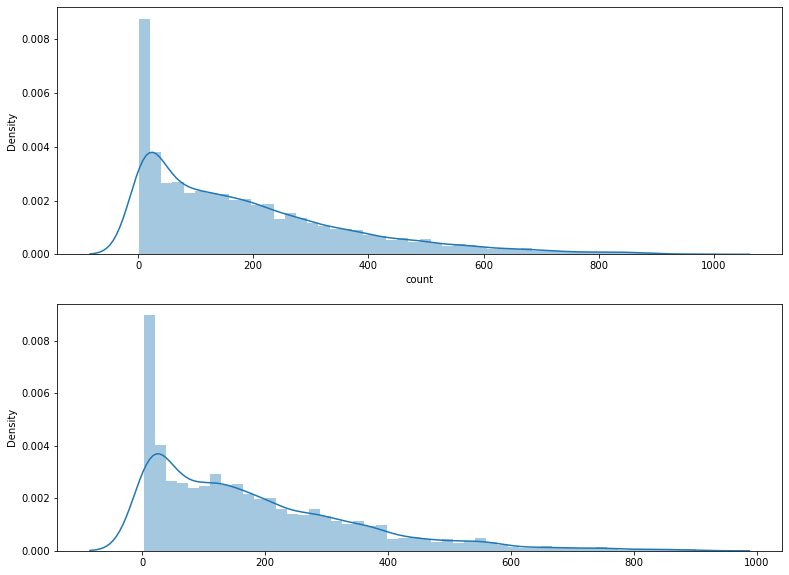

In [188]:
fig, ax = plt.subplots(2,1, figsize=[13,10])
sns.distplot(ylabels_count, bins=50, ax=ax[0])
sns.distplot(np.exp(predsTest), bins=50, ax=ax[1])

## Creating Submission File

In [191]:
prediction = [max(0, x) for x in np.exp(predsTest)]

submission = pd.DataFrame({"datetime" : datetime_col, "count" : prediction})

In [193]:
submission.to_csv('submission.csv', index=False)